[](./SH_RT.png)

### When SH plane waves go beyond critical
Consider an SH plane wave (i.e., one with its polarization in- and out of your screen) in a medium with wavespeed $\beta_1$ and shear modulus $\mu_1$. If this plane wave arrives at an interface with a medium with $\beta_2, \mu_2$ at an incidence angle $j_1$, the angle of the transmitted plane wave follows Snell's Law. The situation is drawn here:
![](SH_RT.png)

### Love wave theory
Now, if $\beta_2>\beta_1$, and the incidence angle is greater than the critical angle, the reflection is called "total" and transmission results in an evanescent wave. This means energy is not transmitted in depth, but trapped near the interface. The result is a guided wave we call a "Love Wave" in seismology. Love waves are not only guided surface waves, they also exhibit wave dispersion: their wavespeed in the top layer depends on frequency.

The dispersion relation for Love waves is
$$
  \tan{(k_xr_{\beta_1}h)}= 
  \frac{\mu_2r_{\beta_2}^*}{\mu_1r_{\beta_1}},
$$
where $r_{\beta_2}^*=\sqrt{1-(c_x/\beta_2)^2}$ and $r_{\beta_1}=\sqrt{(c_x/\beta_1)^2-1}$. The horizontal wavespeed $c_x$ is constant by virtue of the (welded) boundary conditions.

### Modeling Love waves
Let us model this dispersion relation for parameters that represent "a typical" Earth's crust.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook # won't work in colab; comment out in that case.
from scipy.optimize import fsolve

The dispersion relation for Love waves in a layer over a half-space:

In [3]:
def disp_rel(cx,omega,h,beta1,beta2,mu1,mu2):
    eta = (h/cx)*np.sqrt((cx/beta1)**2-1)
    lhs =  np.tan(omega*eta)
    rhs = (mu2*np.sqrt(1-(cx/beta2)**2)/mu1)*(h/(cx*eta))
    return lhs - rhs

Typical crustal layer over the mantle half-space:

In [4]:
beta1 = 3900
beta2 = 4600
h= 40000
rho1=2800
rho2=3300
mu1 = rho1*(beta1**2)
mu2 = rho2*(beta2**2)

In [5]:
period = np.logspace(0.05,1,num=200)
omegas = 2*np.pi/period

Define starting values for $c_x$, and a matrix with zeros to be filled:

In [6]:
cx_start = np.array([3950,4100,4200,4300])
cx = np.zeros((len(period),len(cx_start)))

Now, we search with the fsolve function to find the roots of the dispersion relation for Love waves, for each frequency. These tell us the possible love-wave modes in the crust: 

In [7]:
i=0
for omega in omegas:
    # solve for n roots of cx (modes) for each frequency omega :
    cxomega = fsolve(disp_rel,cx_start,args=(omega,h,beta1,beta2,mu1,mu2))
    cx[i,:] = cxomega
    i += 1

/home/kvan637/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/home/kvan637/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/kvan637/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


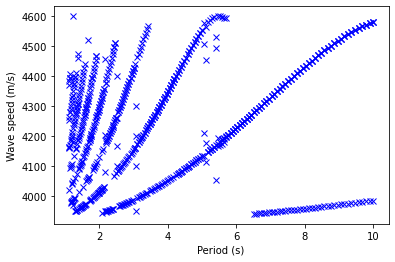

In [8]:
plt.figure()
plt.plot(period,cx,'x',color='blue')
plt.xlabel('Period (s)')
plt.ylabel('Wave speed (m/s)')
plt.show()

As you can see, at shorter periods there are more love wave modes that "fit" in the crust. As we go to longer wavelengths, we are down to only two modes for Love waves up to 10s period.

The root finding is not always working; this gives rise to non-convergence and outliers in $c(\omega)$.

### Homework
Try extending the period to more than 10s. How would you adjust your strategy on the number of roots you expect?